In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [20]:
df = pd.read_excel('Mounjaro Data.xlsx')

# Week 1: Data Exploration & Set up of the Project.

In [21]:
df.head()

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold
0,2020-01-01,580.481,220.1030,341.4920,359.7310,1501.807
1,2020-02-01,563.638,161.7300,283.3785,313.4245,1322.171
2,2020-03-01,568.605,190.9875,312.2535,350.0440,1421.890
3,2020-04-01,574.849,194.8790,316.1860,356.3410,1442.255
4,2020-05-01,695.019,276.1740,422.6145,402.7915,1796.599


In [22]:
df.tail()

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold
51,2024-04-01,4509.7055,2570.2245,3449.8270,4498.0915,15027.8485
52,2024-05-01,6034.4480,3501.0880,5196.3055,6307.3720,21039.2135
53,2024-06-01,4831.8710,3030.2275,4391.1545,5249.8620,17503.1150
54,2024-07-01,4748.4775,2609.4560,3762.8665,4798.5925,15919.3925
55,2024-08-01,3564.6370,1765.1660,1878.4145,2943.7155,10151.9330


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Month, Year of week ending date  56 non-null     datetime64[ns]
 1   Volume Sold - East               56 non-null     float64       
 2   Volume Sold - West               56 non-null     float64       
 3   Volume Sold - South              56 non-null     float64       
 4   Volume Sold - Midwest            56 non-null     float64       
 5   Total Volume Sold                56 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.8 KB


In [24]:
df.dtypes

Month, Year of week ending date    datetime64[ns]
Volume Sold - East                        float64
Volume Sold - West                        float64
Volume Sold - South                       float64
Volume Sold - Midwest                     float64
Total Volume Sold                         float64
dtype: object

In [26]:
df.isnull().sum()

Month, Year of week ending date    0
Volume Sold - East                 0
Volume Sold - West                 0
Volume Sold - South                0
Volume Sold - Midwest              0
Total Volume Sold                  0
dtype: int64

In [27]:
df.duplicated().sum()

1

In [28]:
duplicated_row = df[df.duplicated()]
duplicated_row

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold
18,2021-07-01,1659.037,611.1325,795.301,1212.565,4278.0355


In [29]:
df.head(30)

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold
0,2020-01-01,580.4810,220.1030,341.4920,359.7310,1501.8070
1,2020-02-01,563.6380,161.7300,283.3785,313.4245,1322.1710
2,2020-03-01,568.6050,190.9875,312.2535,350.0440,1421.8900
3,2020-04-01,574.8490,194.8790,316.1860,356.3410,1442.2550
4,2020-05-01,695.0190,276.1740,422.6145,402.7915,1796.5990
5,2020-06-01,642.3145,247.8220,360.9805,394.1560,1645.2730
6,2020-08-01,676.7035,272.1830,383.0140,398.5955,1730.4960
7,2020-09-01,620.6850,220.7355,360.1145,372.5570,1574.0920
8,2020-10-01,892.4715,393.8955,511.1435,562.6380,2360.1485
9,2020-11-01,746.8080,289.8285,433.9220,412.4770,1883.0355


In [30]:
#Removing the duplicated row

df = df.drop(index = 18)

In [31]:
df.head(30)

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold
0,2020-01-01,580.4810,220.1030,341.4920,359.7310,1501.8070
1,2020-02-01,563.6380,161.7300,283.3785,313.4245,1322.1710
2,2020-03-01,568.6050,190.9875,312.2535,350.0440,1421.8900
3,2020-04-01,574.8490,194.8790,316.1860,356.3410,1442.2550
4,2020-05-01,695.0190,276.1740,422.6145,402.7915,1796.5990
5,2020-06-01,642.3145,247.8220,360.9805,394.1560,1645.2730
6,2020-08-01,676.7035,272.1830,383.0140,398.5955,1730.4960
7,2020-09-01,620.6850,220.7355,360.1145,372.5570,1574.0920
8,2020-10-01,892.4715,393.8955,511.1435,562.6380,2360.1485
9,2020-11-01,746.8080,289.8285,433.9220,412.4770,1883.0355


In [34]:
#Generating summary statistics

summary = df[['Volume Sold - East','Volume Sold - West','Volume Sold - Midwest','Volume Sold - South']].describe()


In [35]:
summary

,Volume Sold - East,Volume Sold - West,Volume Sold - Midwest,Volume Sold - South
count,55.000000,55.000000,55.000000,55.000000
mean,2831.699945,1468.899209,2568.671945,1965.542073
std,1781.026783,1126.583893,1988.655806,1609.620102
min,563.638000,161.730000,313.424500,283.378500
25%,1126.464750,426.726000,702.965750,592.356000
50%,2768.545000,1202.327500,2169.458000,1399.662500
75%,4376.071250,2460.015250,4269.962000,3312.753500
max,6221.659500,3841.101500,6723.577000,5610.439500


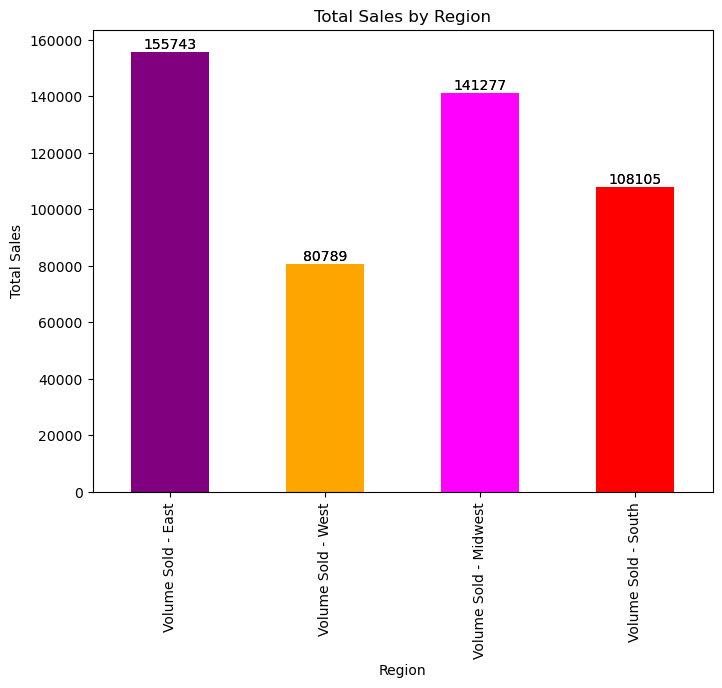

In [67]:
#Visualizations


Total_volume_sold = df[['Volume Sold - East','Volume Sold - West','Volume Sold - Midwest','Volume Sold - South']].sum()

plt.figure(figsize=(8, 6))
ax = Total_volume_sold.plot(kind='bar', color=['purple', 'orange', 'magenta', 'red'])
Total_volume_sold.plot(kind='bar', color=['purple', 'orange', 'magenta', 'red'])
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2,  
            i.get_height() + 0.5,          
            f'{i.get_height():.0f}',       
            ha='center',                   
            va='bottom',                   
            fontsize=10,                  
            color='black') 

plt.show()

<h1> Inferences </h1>

<h2>From this graph we can see that majority of the sales occured across the East region and the Midwest region. </h2>

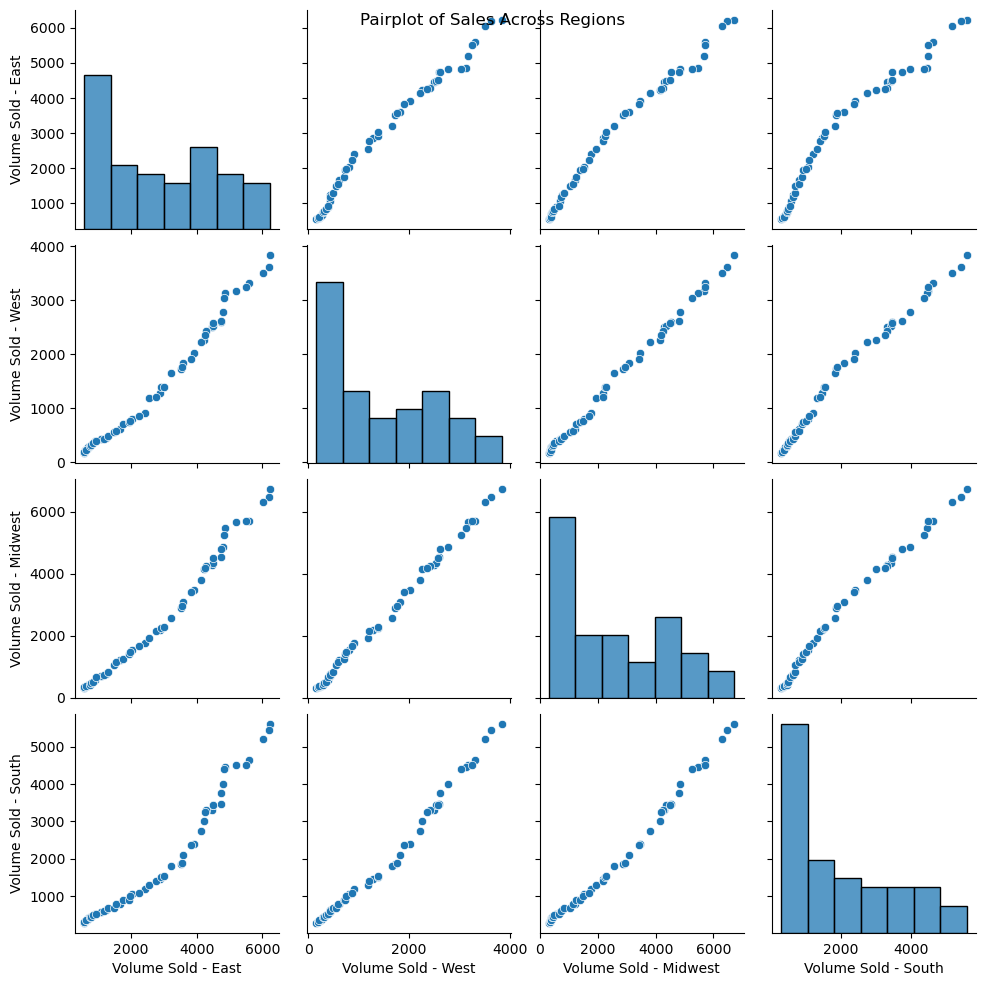

In [66]:
sns.pairplot(df[['Volume Sold - East','Volume Sold - West','Volume Sold - Midwest','Volume Sold - South']])
plt.suptitle('Pairplot of Sales Across Regions')
plt.show()

<h1> Inferences </h1>

<h2> This pairplot shows us a positive correlation across each region with the slope in an upward direction. </h2>

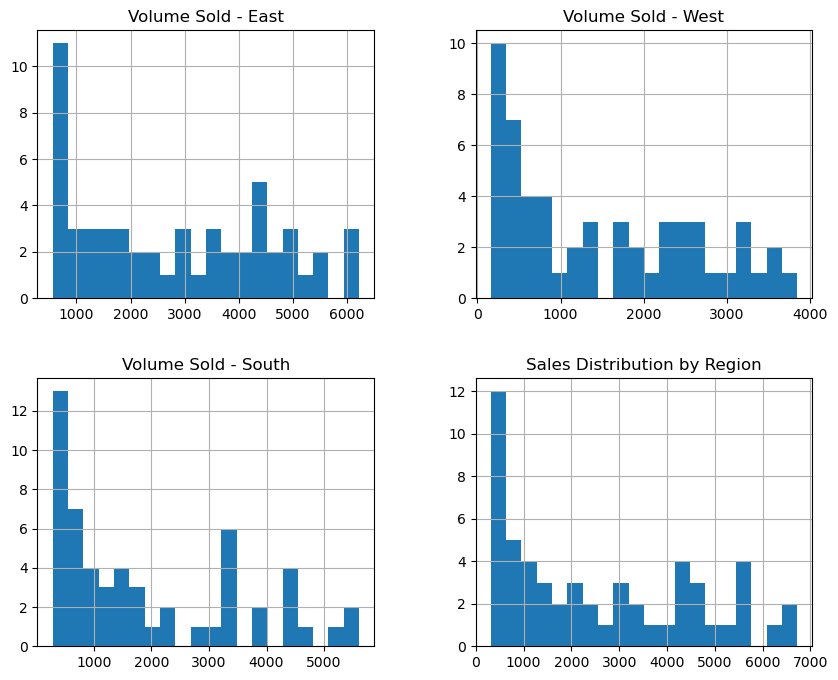

In [68]:
#Histogram

df[['Volume Sold - East', 'Volume Sold - West', 'Volume Sold - South', 'Volume Sold - Midwest']].hist(bins=20, figsize=(10, 8))
plt.title('Sales Distribution by Region')
plt.show()


<b> We can see that in all the plots the data points are majorly distributed towards the left side of the plots and we can say that it is positively skewed. </b>

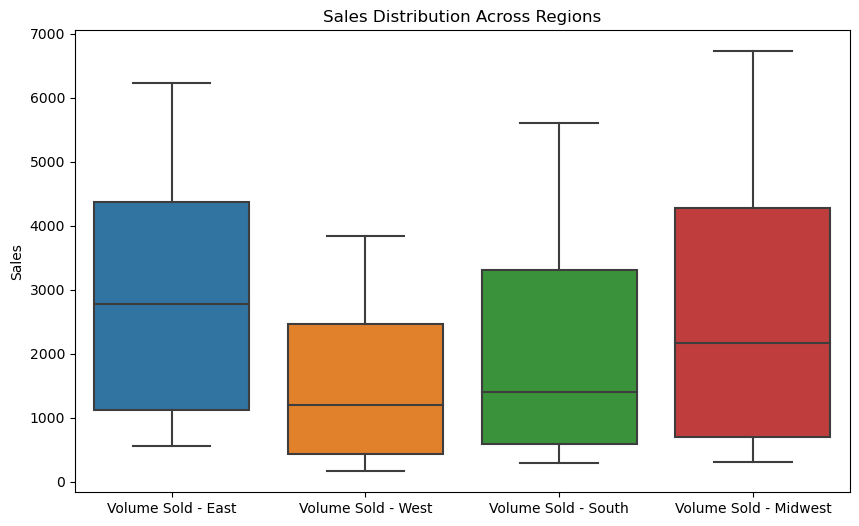

In [69]:
#Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Volume Sold - East', 'Volume Sold - West', 'Volume Sold - South', 'Volume Sold - Midwest']])
plt.title('Sales Distribution Across Regions')
plt.ylabel('Sales')
plt.show()

<h1> Inferences </h1>

<b> The East shows that the volumes lie from 1000 to <4500 whereas West has volumes ranging from 500 to 2500. South has volume ranging from >500 to <3500 & Midwest has volume ranging from >500 and <4500. The data is not skewed in any column since all of the median points do not lie at the lower or the upper ends of the boxplots. </b>

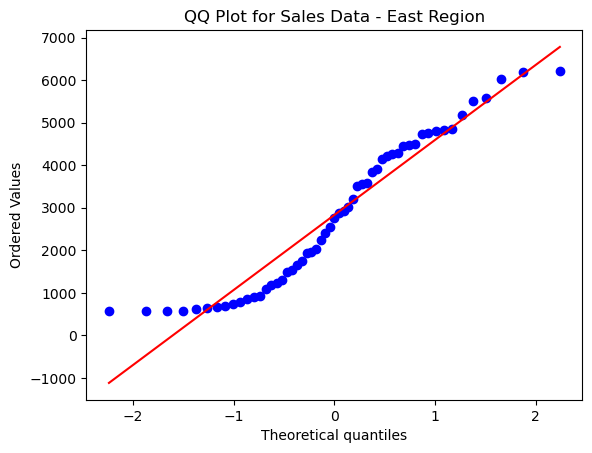

In [74]:
# QQ Plot for Normality

east_data = df['Volume Sold - East']

stats.probplot(east_data, dist="norm", plot=plt)
plt.title('QQ Plot for Sales Data - East Region')
plt.ylabel('Ordered Values')
plt.show()

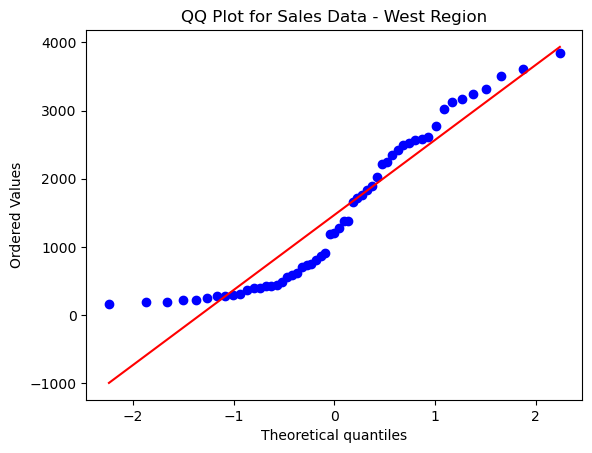

In [70]:
# QQ Plot for Normality

west_data = df['Volume Sold - West']

stats.probplot(west_data, dist="norm", plot=plt)
plt.title('QQ Plot for Sales Data - West Region')
plt.ylabel('Ordered Values')
plt.show()

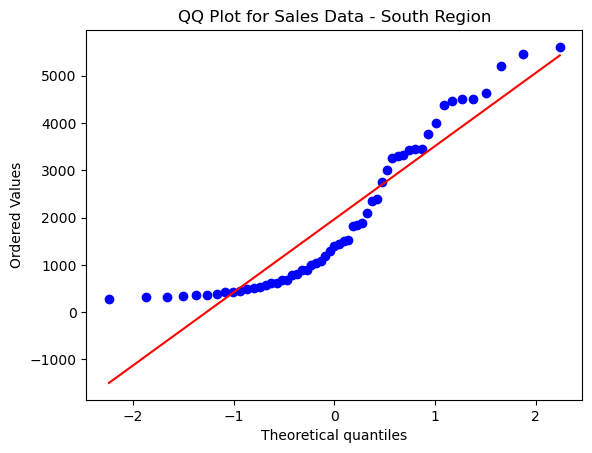

In [71]:
# QQ Plot for Normality

south_data = df['Volume Sold - South']

stats.probplot(south_data, dist="norm", plot=plt)
plt.title('QQ Plot for Sales Data - South Region')
plt.ylabel('Ordered Values')
plt.show()

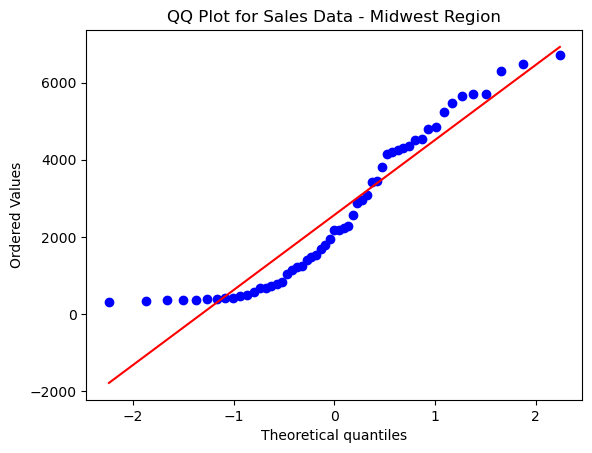

In [72]:
# QQ Plot for Normality

midwest_data = df['Volume Sold - Midwest']

stats.probplot(midwest_data, dist="norm", plot=plt)
plt.title('QQ Plot for Sales Data - Midwest Region')
plt.ylabel('Ordered Values')
plt.show()

<h1> Inferences </h1>

<b> The lines for all of the areas form a wave like patternwhich indicates that the data is not following a normal 
distribution and also indicates that the data follows a cyclic/periodic behavioural pattern. </b>


<Figure size 1000x600 with 0 Axes>

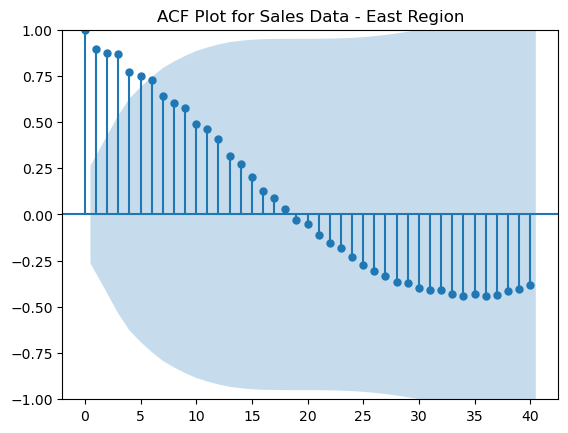

<Figure size 1000x600 with 0 Axes>

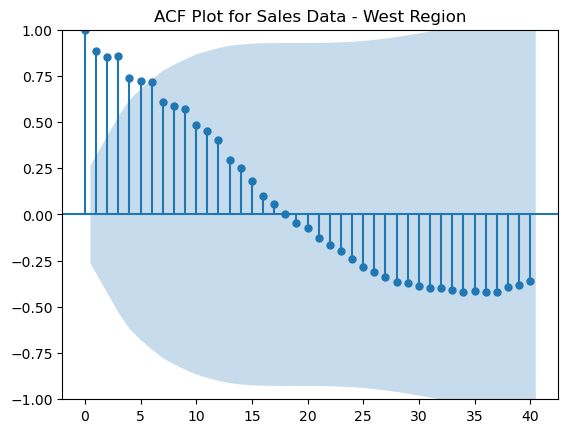

<Figure size 1000x600 with 0 Axes>

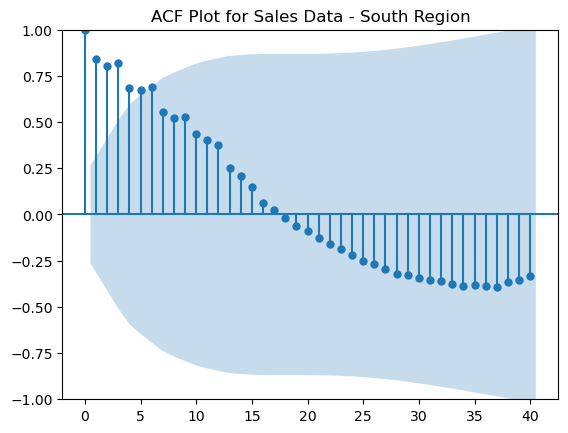

<Figure size 1000x600 with 0 Axes>

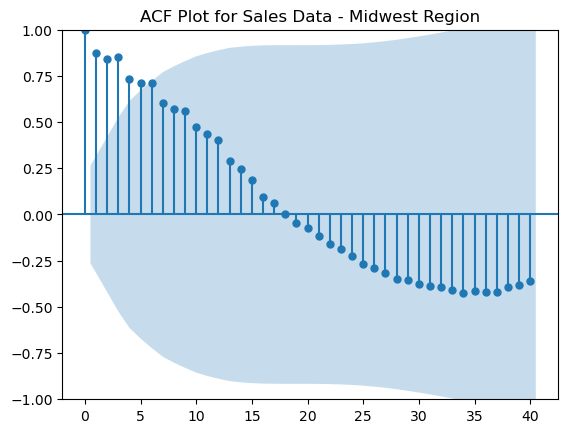

In [84]:
# Acf plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(east_data, lags=40)  
plt.title('ACF Plot for Sales Data - East Region')
plt.show()

# Acf plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(west_data, lags=40)  
plt.title('ACF Plot for Sales Data - West Region')
plt.show()

# Acf plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(south_data, lags=40)  
plt.title('ACF Plot for Sales Data - South Region')
plt.show()

# Acf plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(midwest_data, lags=40)  
plt.title('ACF Plot for Sales Data - Midwest Region')
plt.show()

<h1> Inferences </h1>

<b> There is a gradual decrease in the plot values which suggests the presence of trends or cyclical patterns in the sales data. </b>

In [91]:
df.set_index('Month, Year of week ending date', inplace=True)

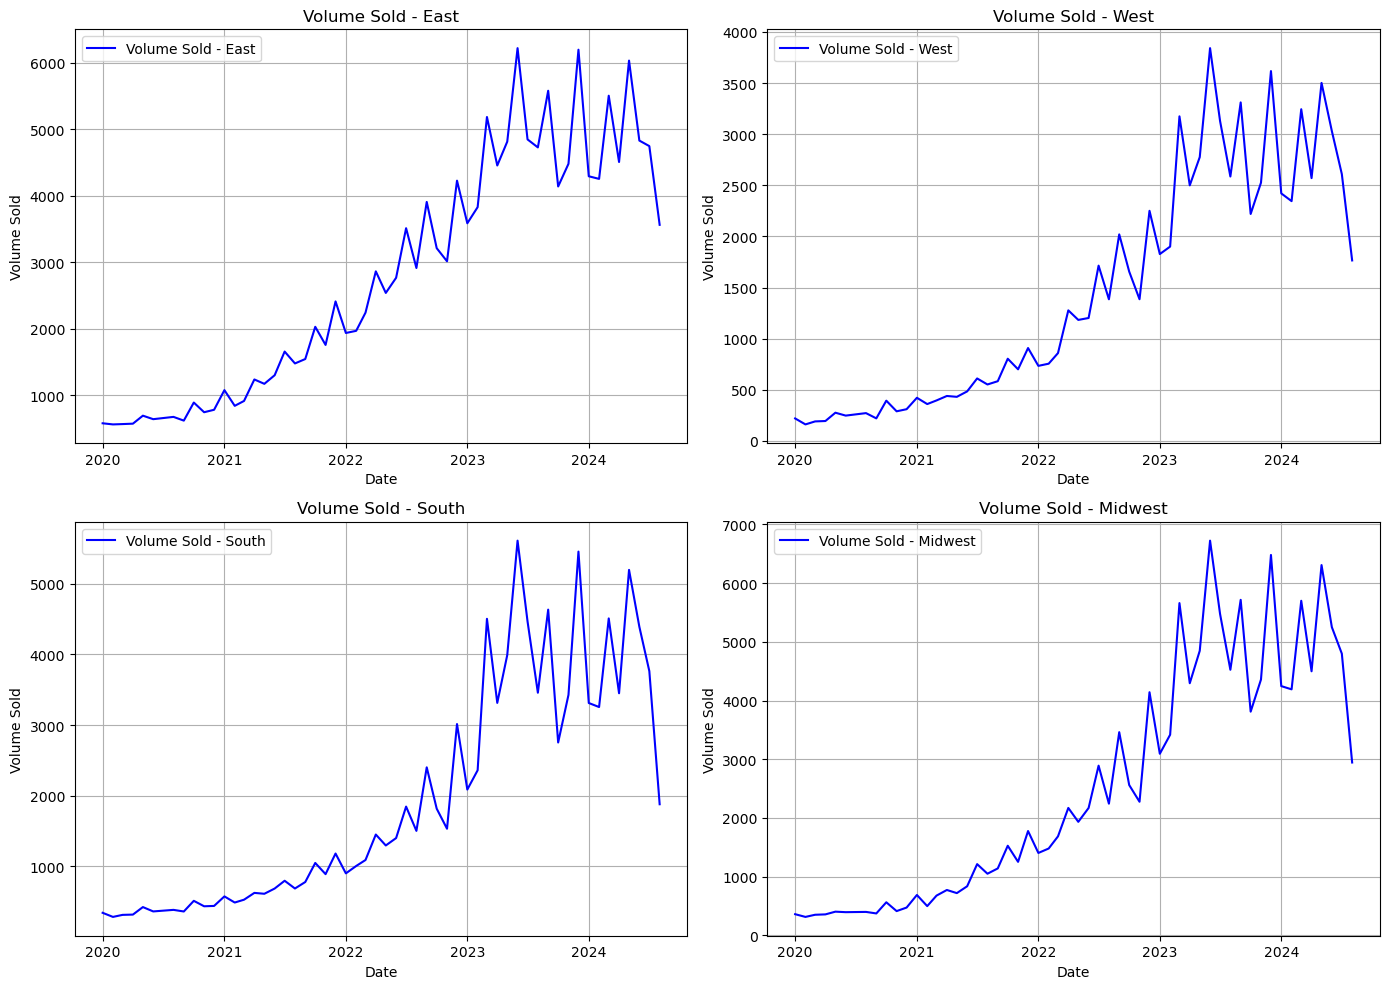

In [92]:
#Time Series plots

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes = axes.flatten()

regions = ['Volume Sold - East', 'Volume Sold - West', 'Volume Sold - South', 'Volume Sold - Midwest']

for ax, region in zip(axes, regions):
    ax.plot(df.index, df[region], label=region, color='blue')
    ax.set_title(region)
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume Sold')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


<h1> Inferences </h1>

<b> The plots show us that there a minimal increase from 2020 to 2022 but after that we see that the volumes have increased tremendously. 
There also has been periods where there was a steep decrease in volume sold for each region from 2022 to 2024. </b>

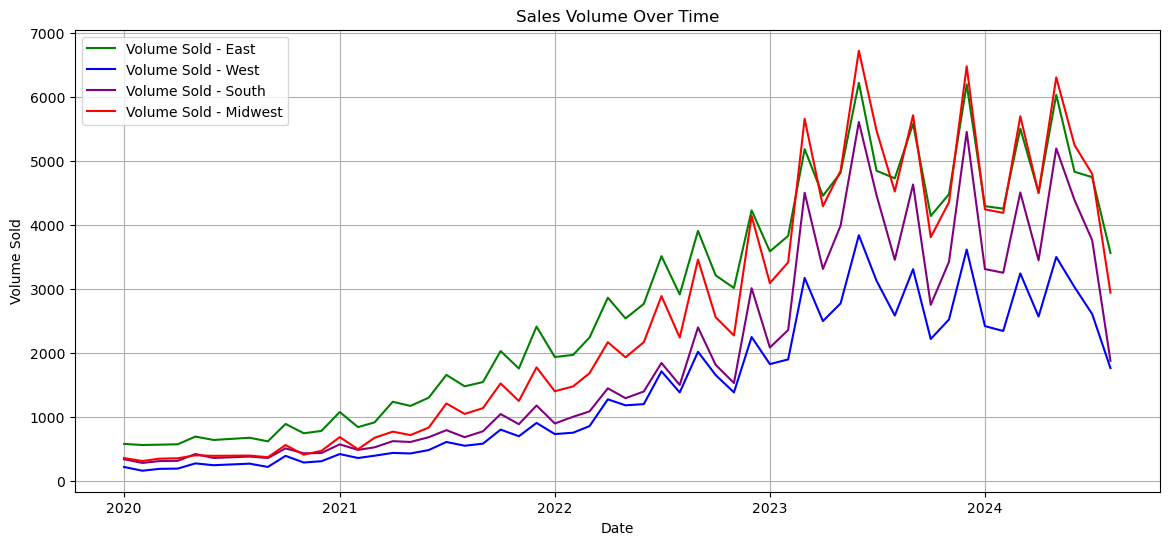

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))


plt.plot(df.index, df['Volume Sold - East'], label='Volume Sold - East', color='green')
plt.plot(df.index, df['Volume Sold - West'], label='Volume Sold - West', color='blue')
plt.plot(df.index, df['Volume Sold - South'], label='Volume Sold - South', color='purple')
plt.plot(df.index, df['Volume Sold - Midwest'], label='Volume Sold - Midwest', color='red')

plt.title('Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Sold')
plt.legend()
plt.grid()
plt.show()
